In [ ]:
# # Restarting the core:|
import os
os._exit(0)


In [1]:
# from sympy import *
from sympy import symbols, Matrix, Function

from Multibody_analyzer.basic_math import *
from Multibody_analyzer.EMO_matrices import *
from Multibody_analyzer.link_object_class import *
from Multibody_analyzer.positional_conatraint_class import *
from Multibody_analyzer.multibody_system_class import *
from Multibody_analyzer.lqr_control import *
from Multibody_analyzer.Energy_shaping_control import *
from Multibody_analyzer.get_Descartes_2D import *

# from IPython.display import Math

# init_printing() 

In [2]:
####### Define basic constants #######
t = symbols('t')
g = symbols('g')
gravitational_acc_vector = Matrix([0, -g, 0])
####### Define basic constants #######

####### Define generalized coordinates #######
x = Function('x')(t)
y = Function('y')(t)
theta_bot = Function('theta_bot')(t)
theta_left_1 = Function('theta_left_1')(t)
theta_left_2 = Function('theta_left_2')(t)
theta_right_1 = Function('theta_right_1')(t)
theta_right_2 = Function('theta_right_2')(t)

coordinate_list = [x,y,theta_bot, theta_left_1, theta_left_2, theta_right_1, theta_right_2]
generalized_coordinates_dimension, generalized_coordinates, generalized_velocities, generalized_accelerations = Create_generalized_coordinate_system(coordinate_list,t)
####### Define generalized coordinates #######
generalized_coordinates

####### Define link 1 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m1 = symbols('m1')
lc1 = symbols('lc1') # Sub script 'c' means the center of mass
Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1 = symbols('Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1')

link_1_name = 'Body of the planer robot'
link_1_notes = 'Translates along x and y, rotates about z'
link_1_mass = m1
link_1_MoI = Create_Moment_of_Inertia_tensor(Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1)

HTM_x = construct_HTM(eye(3), [x,0,0])
HTM_y = construct_HTM(eye(3), [0,y,0])
HTM_Rz = construct_HTM(Rz(theta_bot), [0,0,0])
HTM1 = HTM_y * HTM_x * HTM_Rz
link_1_Orientation_matrix, link_1_CoG_vector = decompose_HTM(HTM1)

link1_Constants_symbols = [m1, lc1, Ixx1,Iyy1,Izz1,Ixy1,Ixz1,Iyz1]
link1 = Create_link_object(link_1_name, link_1_notes, link_1_mass, link_1_MoI, link_1_CoG_vector, link_1_Orientation_matrix, generalized_coordinates, link1_Constants_symbols)
# link1.print_link_info()
####### Define link 1 properties #######

####### Define link 2 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m2 = symbols('m2')
lc2 = symbols('lc2') # Sub script 'c' means the center of mass
Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2 = symbols('Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2')
# We need an additional parameter for length of link1,
l_body = symbols('l_body')

link_2_name = 'Left leg upper link, link 2'
link_2_notes = '1. Translates along the body away from center of mass by 1/2 of body length, l_body. \n 2. Rotate about the edge'
link_2_mass = m2
link_2_MoI = Create_Moment_of_Inertia_tensor(Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2)

HTM2 = HTM1 * construct_HTM(eye(3),[-0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_left_1),[0,0,0]) * construct_HTM(eye(3), [lc2, 0, 0])
link_2_Orientation_matrix, link_2_CoG_vector = decompose_HTM(HTM2)


link2_Constants_symbols = [m2, lc2, Ixx2,Iyy2,Izz2,Ixy2,Ixz2,Iyz2, l_body]
link2 = Create_link_object(link_2_name, link_2_notes, link_2_mass, link_2_MoI, link_2_CoG_vector, link_2_Orientation_matrix, generalized_coordinates, link2_Constants_symbols)
# link1.print_link_info()
####### Define link 2 properties #######

####### Define link 3 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation


m3 = symbols('m3')
lc3 = symbols('lc3') # Sub script 'c' means the center of mass
Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3 = symbols('Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3')
# We need an additional parameter for length of link1,
l_left_1 = symbols('l_left_1')
l_left_2 = symbols('l_left_2')


link_3_name = 'Left leg lower link, link 3'
link_3_notes = 'Rotates about the R joint connected to Left leg upper link'
link_3_mass = m3
link_3_MoI = Create_Moment_of_Inertia_tensor(Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3)

HTM2_joint_to_joint = construct_HTM(eye(3),[-0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_left_1),[0,0,0]) * construct_HTM(eye(3), [l_left_1, 0, 0])
HTM3 = HTM1 * HTM2_joint_to_joint * construct_HTM(Rz(theta_left_2), [0,0,0]) * construct_HTM(eye(3), [lc3,0,0])
link_3_Orientation_matrix, link_3_CoG_vector = decompose_HTM(HTM3)

link3_Constants_symbols = [m3, lc3, Ixx3,Iyy3,Izz3,Ixy3,Ixz3,Iyz3, l_left_1, l_left_2]
link3 = Create_link_object(link_3_name, link_3_notes, link_3_mass, link_3_MoI, link_3_CoG_vector, link_3_Orientation_matrix, generalized_coordinates, link3_Constants_symbols)
# link1.print_link_info()
####### Define link 3 properties #######

####### Define link 4 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m4 = symbols('m4')
lc4 = symbols('lc4') # Sub script 'c' means the center of mass
Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4 = symbols('Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4')
# We need an additional parameter for length of link1,
# l_body = symbols('l_body')

link_4_name = 'Right leg upper link, link 4'
link_4_notes = '1. Translates along the body away from center of mass by 1/2 of body length, l_body. \n 2. Rotate about the edge'
link_4_mass = m4
link_4_MoI = Create_Moment_of_Inertia_tensor(Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4)

HTM4 = HTM1 * construct_HTM(eye(3),[0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_right_1),[0,0,0]) * construct_HTM(eye(3), [lc4, 0, 0])
link_4_Orientation_matrix, link_4_CoG_vector = decompose_HTM(HTM4)

# constants symbols should not be pass in for the second time.
# link4_Constants_symbols = [m4, lc4, Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4, l_body]
link4_Constants_symbols = [m4, lc4, Ixx4,Iyy4,Izz4,Ixy4,Ixz4,Iyz4]
link4 = Create_link_object(link_4_name, link_4_notes, link_4_mass, link_4_MoI, link_4_CoG_vector, link_4_Orientation_matrix, generalized_coordinates, link4_Constants_symbols)
# link1.print_link_info()
####### Define link 4 properties #######

####### Define link 5 properties #######
# name, notes, mass, moment of inertia, position vector to gravity center, rotation

m5 = symbols('m5')
lc5 = symbols('lc5') # Sub script 'c' means the center of mass
Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5 = symbols('Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5')
# We need an additional parameter for length of link1,
l_right_1 = symbols('l_right_1')
l_right_2 = symbols('l_right_2')


link_5_name = 'Right leg lower link, link5'
link_5_notes = 'Rotates about the R joint connected to Right leg upper link'
link_5_mass = m5
link_5_MoI = Create_Moment_of_Inertia_tensor(Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5)

HTM4_joint_to_joint = construct_HTM(eye(3),[0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_right_1),[0,0,0]) * construct_HTM(eye(3), [l_right_1, 0, 0])
HTM5 = HTM1 * HTM4_joint_to_joint * construct_HTM(Rz(theta_right_2), [0,0,0]) * construct_HTM(eye(3), [lc5,0,0])
link_5_Orientation_matrix, link_5_CoG_vector = decompose_HTM(HTM5)

link5_Constants_symbols = [m5, lc5, Ixx5,Iyy5,Izz5,Ixy5,Ixz5,Iyz5, l_right_1, l_right_2]
link5 = Create_link_object(link_5_name, link_5_notes, link_5_mass, link_5_MoI, link_5_CoG_vector, link_5_Orientation_matrix, generalized_coordinates, link5_Constants_symbols)
# link1.print_link_info()
####### Define link 5 properties #######



# Provide link costants
print(link1.link_Constants_symbolical)
link1_Constants_numerical = [1,1,0,0,0,0,0,0]
link1_Constants_numerical = [10,1,1,1,1,1,1,1]

link1.provide_link_constant_numerical_values(link1_Constants_numerical)

print(link2.link_Constants_symbolical)
link2_Constants_numerical = [1,1,0,0,0,0,0,0,4]
link2_Constants_numerical = [1,1,1,1,1,1,1,1,4]

link2.provide_link_constant_numerical_values(link2_Constants_numerical)

print(link3.link_Constants_symbolical)
link3_Constants_numerical = [1,1,0,0,0,0,0,0,1,1]
link3_Constants_numerical = [1,1,1,1,1,1,1,1,1,1]

link3.provide_link_constant_numerical_values(link3_Constants_numerical)

print(link4.link_Constants_symbolical)
link4_Constants_numerical = [1,1,0,0,0,0,0,0]
link4_Constants_numerical = [1,1,1,1,1,1,1,1]

link4.provide_link_constant_numerical_values(link4_Constants_numerical)

print(link5.link_Constants_symbolical)
link5_Constants_numerical = [1,1,0,0,0,0,0,0,1,1]
link5_Constants_numerical = [1,1,1,1,1,1,1,1,1,1]

link5.provide_link_constant_numerical_values(link5_Constants_numerical)



# ####### Constraint Equations #######
constraint_x_coord_left = -2.3
constraint_x_coord_right = 2.3


HTM_bot_left_foot = HTM1 * construct_HTM(eye(3),[-0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_left_1),[0,0,0]) * construct_HTM(eye(3), [l_left_1, 0, 0]) * construct_HTM(Rz(theta_left_2),[0,0,0]) * construct_HTM(eye(3), [l_left_2, 0, 0])
HTM_bot_right_foot = HTM1 * construct_HTM(eye(3),[0.5*l_body, 0 , 0]) * construct_HTM(Rz(theta_right_1),[0,0,0]) * construct_HTM(eye(3), [l_right_1, 0, 0]) * construct_HTM(Rz(theta_right_2),[0,0,0]) * construct_HTM(eye(3), [l_right_2, 0, 0])

_, HTM_bot_left_foot_Vec = decompose_HTM(HTM_bot_left_foot)
_, HTM_bot_right_foot_Vec = decompose_HTM(HTM_bot_right_foot)

# positional_constrain_left_foot = create_positional_constraint_equation_object(HTM_bot_left_foot_Vec+Matrix([2.3,0,0]), t, generalized_coordinates) 
# positional_constrain_right_foot = create_positional_constraint_equation_object(HTM_bot_right_foot_Vec-Matrix([2.3,0,0]), t, generalized_coordinates) 
positional_constrain_left_foot = create_positional_constraint_equation_object(HTM_bot_left_foot_Vec - Matrix([constraint_x_coord_left,0,0]), t, generalized_coordinates) 
positional_constrain_right_foot = create_positional_constraint_equation_object(HTM_bot_right_foot_Vec - Matrix([constraint_x_coord_right,0,0]), t, generalized_coordinates) 


# ####### Contact coordinate vectors #######
# Contact point coordinates 2D
# Form each contact coordinate into 3x1 matrix
contact_coordinate_list = [np.transpose(np.matrix([constraint_x_coord_left,0,0])), 
                           np.transpose(np.matrix([constraint_x_coord_right,0,0]))]

B_mat = Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print('Control matrix:')
display(B_mat)

Link object 'Body of the planer robot' is created.
Link object 'Left leg upper link, link 2' is created.
Link object 'Left leg lower link, link 3' is created.
Link object 'Right leg upper link, link 4' is created.
Link object 'Right leg lower link, link5' is created.
[m1, lc1, Ixx1, Iyy1, Izz1, Ixy1, Ixz1, Iyz1]
Please be sure that link_Constant is proveded in form of: [m1, lc1, Ixx1, Iyy1, Izz1, Ixy1, Ixz1, Iyz1] !!
Printing the numerical values. Please double check if they are correct.
Link mass m1 = 10kg
Link length from joint with its parent link lc_i = 1m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

[m2, lc2, Ixx2, Iyy2, Izz2, Ixy2, Ixz2, Iyz2, l_body]
Please be sure that link_Constant is proveded in form of: [m2, lc2, Ixx2, Iyy2, Izz2, Ixy2, Ixz2, Iyz2, l_body] !!
Printing the numerical values. Please double check if they are correct.
Link mass m2 = 1kg
Link length from joint with its parent link lc_i = 1m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

[m3, lc3, Ixx3, Iyy3, Izz3, Ixy3, Ixz3, Iyz3, l_left_1, l_left_2]
Please be sure that link_Constant is proveded in form of: [m3, lc3, Ixx3, Iyy3, Izz3, Ixy3, Ixz3, Iyz3, l_left_1, l_left_2] !!
Printing the numerical values. Please double check if they are correct.
Link mass m3 = 1kg
Link length from joint with its parent link lc_i = 1m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

[m4, lc4, Ixx4, Iyy4, Izz4, Ixy4, Ixz4, Iyz4]
Please be sure that link_Constant is proveded in form of: [m4, lc4, Ixx4, Iyy4, Izz4, Ixy4, Ixz4, Iyz4] !!
Printing the numerical values. Please double check if they are correct.
Link mass m4 = 1kg
Link length from joint with its parent link lc_i = 1m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

[m5, lc5, Ixx5, Iyy5, Izz5, Ixy5, Ixz5, Iyz5, l_right_1, l_right_2]
Please be sure that link_Constant is proveded in form of: [m5, lc5, Ixx5, Iyy5, Izz5, Ixy5, Ixz5, Iyz5, l_right_1, l_right_2] !!
Printing the numerical values. Please double check if they are correct.
Link mass m5 = 1kg
Link length from joint with its parent link lc_i = 1m
Moment of inertia tensor (kg*m^2): 


<IPython.core.display.Math object>

Control matrix:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [4]:
# u1,u2,u3,u4 = symbols('u1,u2,u3,u4')
# u_vec = Matrix([u1, u2, u3, u4])
# u_vec


In [5]:
link_object_list = [link1, link2, link3, link4, link5]

# underactuated control matrix
B_mat = Matrix([[0,0,0,0],[0,0,0,0],[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
u1,u2,u3,u4 = symbols('u1,u2,u3,u4')
u_vec = Matrix([u1, u2, u3, u4])

constraint_equation_list = [positional_constrain_left_foot, positional_constrain_right_foot]
BSP_alpha = 60
%time multibody_system = system_full_nonlinear_dynamics(link_object_list, generalized_coordinates, t, gravitational_acc_vector,g, B_mat, u_vec, constraint_equation_list, BSP_alpha)

os.system('say "Multibody system object is successfully created."')

(t, g, x(t), y(t), theta_bot(t), theta_left_1(t), theta_left_2(t), theta_right_1(t), theta_right_2(t), Derivative(x(t), t), Derivative(y(t), t), Derivative(theta_bot(t), t), Derivative(theta_left_1(t), t), Derivative(theta_left_2(t), t), Derivative(theta_right_1(t), t), Derivative(theta_right_2(t), t), u1, u2, u3, u4)
                                  Multibody system is created.

CPU times: user 2min 30s, sys: 230 ms, total: 2min 31s
Wall time: 2min 31s


0

In [6]:
# np.matrix([[1., 0., 0., 0.],
#        [0., 1., 0., 0.],
#        [0., 0., 1., 0.],
#        [0., 0., 0., 1.]])

In [246]:
# LQR
# # Provided pose must satisfy that constraint forces are small.
# target_pos = [0,1.414,0 ,-1* np.pi/4-0.21, -1*np.pi/2, -1* np.pi/4+0.21, -1*np.pi/2]
# # target_pos = [0,1.35,0 ,-1* np.pi/4-0.21, -1*np.pi/2, -1* np.pi/4+0.21, -1*np.pi/2]
target_pose = [0,1.4,0 ,-1* np.pi/4-0.23, -1*np.pi/2, -1* np.pi/4+0.23, -1*np.pi/2]
# Q = np.eye(8) # Note that Q R matrices are for actuated DOF state vector only
# Q = eye(8)
Q = np.matrix([[10., 0., 0., 0., 0., 0., 0., 0.],
               [0., 10., 0., 0., 0., 0., 0., 0.],
               [0., 0., 10., 0., 0., 0., 0., 0.],
               [0., 0., 0., 10., 0., 0., 0., 0.],
               [0., 0., 0., 0., 1., 0., 0., 0.],
               [0., 0., 0., 0., 0., 1., 0., 0.],
               [0., 0., 0., 0., 0., 0., 1., 0.],
               [0., 0., 0., 0., 0., 0., 0., 1.]])

R = np.matrix([[1., 0., 0., 0.],
               [0., 1., 0., 0.],
               [0., 0., 1., 0.],
               [0., 0., 0., 1.]]) * 0.001


multibody_system.print_controller_status()
u_initial = multibody_system.lqr_controller_initialization(target_pose, Q, R, '2D', contact_coordinate_list)


LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> True
Use Energy shaper? ==> False
Use Automatic control? ==> False
Use Data logger? ==> True
                          Creating LQR controller with given pose.
                                Calculation mode is 2D mode.

(3, 1)
Total mass of the system is 14.0kg.
System center of gravity is at:
[[0.0983551586459658]
 [1.10493452406210]
 [0]]
Solving reaction force lambda vectors.
Current calculatio mode is 2D!
Left contact point is at x = -2.3m.
Right contact point is at x = 2.3m.

System center of gravity is at x=0.09836, y=1.10493
Equilibrium control vector at given pose is solved!

Linearized system is controllable.
                                 LQR controller is created.
                                 Stable control output u_0 given pose is as below.
 u_0 = [23.202853657912485, 47.517633741568346, -11.5882913561416, 32.58418359572023]

Re

In [247]:
# Energy shaping
target_pose = target_pose

multibody_system.Energy_shaping_controller_initialization(target_pose)




                                 Energy shaping controller is created.
                                 Controller used: u = -k_gain * q_2_dot
                                 Controller gain: k_gain = 1000



In [248]:
# Data logger
multibody_system.data_logger_initialization()
multibody_system.Active_data_logger = True


Data logger is created.
                                 Data logger is created.

                             Use below index words to log data.

                                't_n'
                                'current_state_vector_n'
                                'target_state_vector_n'
                                'current_control_mode'
                                'current_control_vector_n'
                                'current_mechanical_energy'
                                'current_kinetic_energy'
                                'current_potential_energy'
                                'target_mechanical_energy'
                                'target_kinetic_energy'
                                'target_potential_energy'
                                'current_energy_error'
                                'ground_reaction_force'
                                'Lyapunov_stable_condition'



In [249]:
multibody_system.Use_LQR = False
multibody_system.Use_Energy_shaper = False
multibody_system.Use_Automatic_switch_controller = True
multibody_system.print_controller_status()


LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> False
Use Energy shaper? ==> False
Use Automatic control? ==> True
Use Data logger? ==> True


In [250]:
odeeeeeeeeeee = multibody_system.calculate_StateSpace_Lambdify_ConstraintForce_OdeForSolver()

LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> False
Use Energy shaper? ==> False
Use Automatic control? ==> True
Use Data logger? ==> True
                 Baumgarte stabilization parameter alpha = 60 is passed in.
(t, g, x(t), y(t), theta_bot(t), theta_left_1(t), theta_left_2(t), theta_right_1(t), theta_right_2(t), Derivative(x(t), t), Derivative(y(t), t), Derivative(theta_bot(t), t), Derivative(theta_left_1(t), t), Derivative(theta_left_2(t), t), Derivative(theta_right_1(t), t), Derivative(theta_right_2(t), t), u1, u2, u3, u4)


In [251]:

u = u_initial

print(u)


[23.202853657912485, 47.517633741568346, -11.5882913561416, 32.58418359572023]


In [252]:
# a = False
# b = True
# c = False

# (a ^ b ^ c) and not (a and b and c)


In [253]:
# multibody_system.data_logger.current_control_mode
os.system('pwd')


/Users/ayashigure/Desktop/multibody_code_2024_1_26_backup25/Multibody_simulator_version4


0

In [254]:
# sim_num = 0
# multibody_system.data_logger.current_kinetic_energy[0].item()

In [255]:
# multibody_system.Energy_shaping_controller.set_controller_gain(100)
# multibody_system.Energy_shaping_controller.controller_gain


In [279]:
# Reinitialization before simulation
multibody_system.data_logger.clear_log()
multibody_system.Use_LQR = False
multibody_system.Use_Energy_shaper = False
multibody_system.Use_Automatic_switch_controller = True
multibody_system.print_controller_status()

multibody_system.Energy_shaping_controller.set_controller_gain(10)
multibody_system.controller_switching_threshold = 50
multibody_system.set_saturation_value([30,50,30,50]) # Passin max
print('\n')

start = 0
end = 15
total_step = 1500

t_span = np.linspace(start, end, total_step)


# initial_conditions = [0,1.414,0 ,-1* np.pi/4-0.1, -1*np.pi/2, -1* np.pi/4+0.1, -1*np.pi/2, 0,0,0, 0,0,0,0]
# initial_conditions = target_pose + [0,-10,0,0,0,0,0]

initial_conditions = [0,2.,0,-1.25323 - 0.3,-0.31756,-1.25323,-0.31756] + [0,-10,-1,0,0,0,0]


###########
g_n = 9.81


constant = (g_n,*tuple(u))
print(constant)
dt = (end - start) / total_step



start_time = time.time()
print(bcolors.WARNING + 'Start calculating.' + bcolors.ENDC)
# sol = odeint(system_state_space_n, y0 = initial_conditions, t = t_span, tfirst=True, args=constant)

with tqdm(total=total_step, unit="steps",position=0, leave=True) as pbar:
    sol = odeint(odeeeeeeeeeee, y0 = initial_conditions, t = t_span, tfirst=True, args=( pbar, [start, (end-start)/total_step], *constant))

print(bcolors.WARNING + 'Calculation is completed in {}s'.format(round(time.time() - start_time,3)))

multibody_system.raw_integration_result = sol # Store raw result
multibody_system.data_logger.raw_integration_result = sol
os.system('say "Numerical integration is completed."')
os.system('say "Raw integration result is stored to raw_integration_result variable"')


Stored data is cleared!
LQR controller is created: ==> True
Energy shaping controller is created: ==> True
Data logger is created: ==> True
Use LQR controller? ==> False
Use Energy shaper? ==> False
Use Automatic control? ==> True
Use Data logger? ==> True
Controller gain is set to k_gain = 10
Motor saturation output is set to [30, 50, 30, 50] Nm


(9.81, 23.202853657912485, 47.517633741568346, -11.5882913561416, 32.58418359572023)
Start calculating.


  0%|                                               | 0/1500 [00:00<?, ?steps/s]/Users/ayashigure/Desktop/multibody_code_2024_1_26_backup25/Multibody_simulator_version4/Multibody_analyzer/Energy_shaping_control.py:174: RuntimeWarning: divide by zero encountered in divide
  Lyapunov_stable_condition = S / (-(current_actuated_generalized_velocity_vector * np.transpose(current_actuated_generalized_velocity_vector)))
  0%|▏                                      | 6/1500 [00:12<27:10,  1.09s/steps]

Controller is switched to LQR


100%|████████████████████████████████████| 1500/1500 [08:33<00:00,  2.92steps/s]


Calculation is completed in 513.632s


0

In [280]:
# Create folder and log the data
sim_num += 1
multibody_system.data_logger.data_save(sim_num)
os.system('say "Result data from Simulation number {} is saved to visualized folder."'.format(sim_num))

/Users/ayashigure/Desktop/multibody_code_2024_1_26_backup25/Multibody_simulator_version4/Multibody_analyzer/data_logger_class.py:140: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(save_path, np.array([self.t_n ,


Raw data is saved to ./visualized/Simulation No11/Simulation Raw data sol No11!


0

In [281]:
# integration_step = len(multibody_system.data_logger.current_kinetic_energy)
t_print = multibody_system.data_logger.t_n

def list_checker(target_list,t_print):
    binarilized_list = []
    for i in range(len(target_list) - 1):
        if target_list[i] == target_list[i+1]:
            binarilized_list.append(0)
        else:
            binarilized_list.append(1)
            changed_flag = True
            changed_time = t_print[i]
            
        if sum(binarilized_list) == 0:
            changed_flag = False
            changed_time = 0
    return binarilized_list, changed_flag, changed_time


check_result, changed_flag , changed_time = list_checker(multibody_system.data_logger.current_control_mode, t_print) 

if changed_flag == False:
    os.system('say "Something maybe wrong, Connntroller is not switched at all."')
else:
    os.system('say "Connntroller is switched from energy shaping to LQR at {} seconds."'.format(np.round(changed_time,2)))
# plt.plot(t_print, np.ones(len(t_print)))
# plt.axvline(x = changed_time, color = 'b')


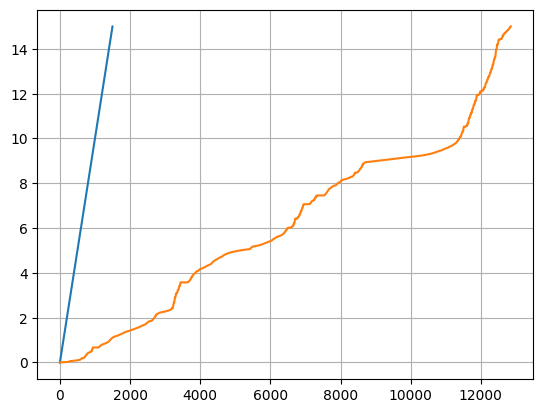

In [282]:
plt.plot(t_span)
plt.plot(t_print)
plt.grid()
plt.show()

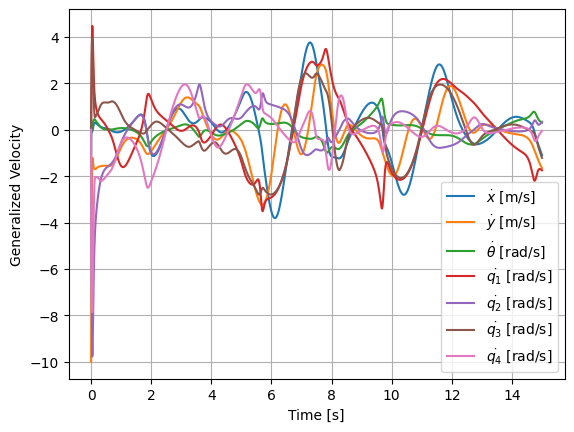

In [283]:
# Generalized velocity solution
# USE 't_span' here!

system_dimension = multibody_system.system_dimension
for i in range(system_dimension):
    # plot x_dot, y_dot, theta_dot, q_dot_1~4
    plt.plot(t_span, sol.T[system_dimension + i])
plt.grid()
plt.legend([r'$\dot{x}$ [m/s]', 
            r'$\dot{y}$ [m/s]',
            r'$\dot{\theta}$ [rad/s]',
            r'$\dot{q_1}$ [rad/s]',
            r'$\dot{q_2}$ [rad/s]',
            r'$\dot{q_3}$ [rad/s]',
            r'$\dot{q_4}$ [rad/s]'])

plt.xlabel('Time [s]')
plt.ylabel('Generalized Velocity')
plt.savefig('./visualized/Simulation No{}/Generalized velocity plot.png'.format(sim_num))

plt.show()


In [6]:
import os
os.system('say yi sei should go get some quality eepi to recharge and prepare for the fierce ')

0

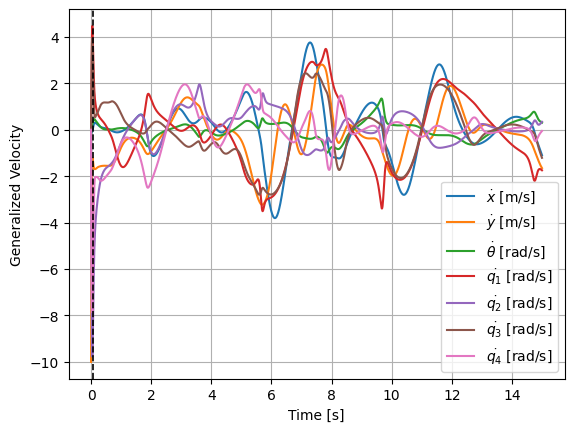

0

In [284]:
# Generalized velocity solution
# USE 't_span' here!

system_dimension = multibody_system.system_dimension
for i in range(system_dimension):
    # plot x_dot, y_dot, theta_dot, q_dot_1~4
    plt.plot(t_span, sol.T[system_dimension + i])
plt.grid()
plt.legend([r'$\dot{x}$ [m/s]', 
            r'$\dot{y}$ [m/s]',
            r'$\dot{\theta}$ [rad/s]',
            r'$\dot{q_1}$ [rad/s]',
            r'$\dot{q_2}$ [rad/s]',
            r'$\dot{q_3}$ [rad/s]',
            r'$\dot{q_4}$ [rad/s]'])

plt.xlabel('Time [s]')
plt.ylabel('Generalized Velocity')
plt.axvline(x = changed_time, color = 'k', linestyle='--',linewidth=1.2)
plt.savefig('./visualized/Simulation No{}/Generalized velocity plot2.png'.format(sim_num))

plt.show()
os.system('say "Generalized velocity plot is generated."')


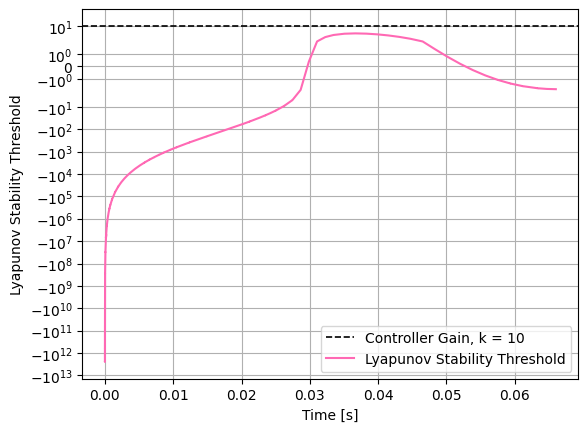

0

In [285]:
# multibody_system.data_logger.Lyapunov_stable_condition

Lyapunov_stable_condition = []
t_print_short = []
for i in range(len(multibody_system.data_logger.Lyapunov_stable_condition)):
    # Elements after LQR is on are set to 0.
    if multibody_system.data_logger.Lyapunov_stable_condition[i] != 0.:
        Lyapunov_stable_condition.append(multibody_system.data_logger.Lyapunov_stable_condition[i].item())
        t_print_short.append(multibody_system.data_logger.t_n[i])

energy_shaper_gain = multibody_system.Energy_shaping_controller.controller_gain

plt.axhline(y = energy_shaper_gain, color = 'k', linestyle='--',linewidth=1.2)
plt.plot(t_print_short, Lyapunov_stable_condition, color = 'hotpink') # mediumvioletred
plt.legend(['Controller Gain, k = {}'.format(energy_shaper_gain),'Lyapunov Stability Threshold'])
plt.grid()
plt.yscale('symlog')
plt.xlabel('Time [s]')
plt.ylabel('Lyapunov Stability Threshold')

plt.savefig('./visualized/Simulation No{}/Lyapunov stablity.png'.format(sim_num))
plt.show()

os.system('say "Liiaponov stability condition plot is generated."')

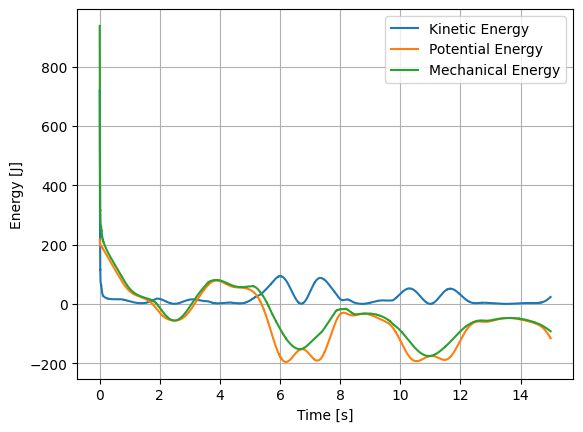

In [286]:


KE = []
PE = []
ME = []
for i in range(len(multibody_system.data_logger.current_kinetic_energy)):
    KE.append(multibody_system.data_logger.current_kinetic_energy[i].item())
    PE.append(multibody_system.data_logger.current_potential_energy[i].item())
    ME.append((multibody_system.data_logger.current_kinetic_energy[i] + multibody_system.data_logger.current_potential_energy[i]).item())
plt.plot(t_print, KE)
plt.plot(t_print, PE)
plt.plot(t_print, ME)

plt.grid()
plt.legend(['Kinetic Energy', 'Potential Energy', 'Mechanical Energy'])
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.savefig('./visualized/Simulation No{}/Energy_plot.png'.format(sim_num))
plt.show()



# Target_ME = []
# Energy_error = []
# for i in range(len(multibody_system.data_logger.target_mechanical_energy)):
#     Target_ME.append(multibody_system.data_logger.target_mechanical_energy[i].item())
#     Energy_error.append(multibody_system.data_logger.current_energy_error[i].item())
# plt.plot(Target_ME)
# plt.plot(Energy_error)




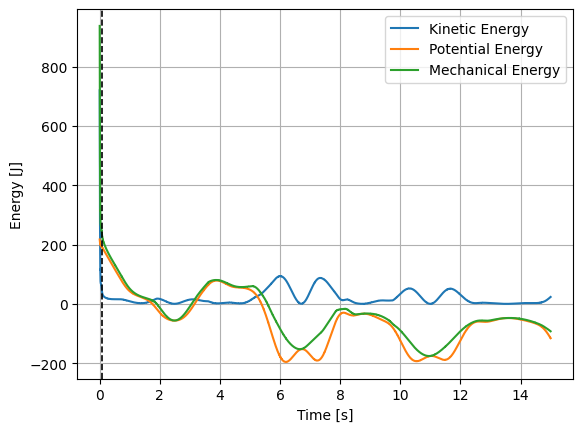

0

In [287]:

KE = []
PE = []
ME = []
for i in range(len(multibody_system.data_logger.current_kinetic_energy)):
    KE.append(multibody_system.data_logger.current_kinetic_energy[i].item())
    PE.append(multibody_system.data_logger.current_potential_energy[i].item())
    ME.append((multibody_system.data_logger.current_kinetic_energy[i] + multibody_system.data_logger.current_potential_energy[i]).item())
plt.plot(t_print, KE)
plt.plot(t_print, PE)
plt.plot(t_print, ME)

plt.grid()
plt.legend(['Kinetic Energy', 'Potential Energy', 'Mechanical Energy'])
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.axvline(x = changed_time, color = 'k', linestyle='--',linewidth=1.2)

plt.savefig('./visualized/Simulation No{}/Energy_plot2.png'.format(sim_num))
plt.show()

os.system('say "Energy plot is generated."')


In [288]:
multibody_system.data_logger.ground_reaction_force[10]

array([[2435.77431554],
       [4124.83499909]])

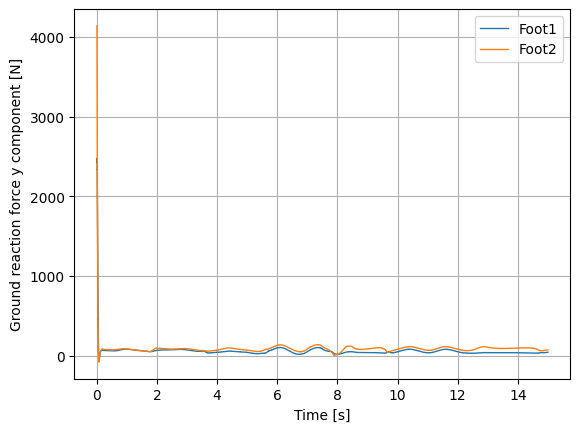

In [289]:
multibody_system.data_logger.ground_reaction_force

Foot1 = []
Foot2 = []
for i in range(len(multibody_system.data_logger.ground_reaction_force)):
    Foot1.append(multibody_system.data_logger.ground_reaction_force[i][0].item())
    Foot2.append(multibody_system.data_logger.ground_reaction_force[i][1].item())

plt.plot(t_print, Foot1, linewidth=1)
plt.plot(t_print, Foot2, linewidth=1)

plt.grid()
plt.legend(['Foot1', 'Foot2'])
plt.ylabel("Ground reaction force y component [N]")
plt.xlabel("Time [s]")
plt.savefig('./visualized/Simulation No{}/Ground_reaction.png'.format(sim_num))
plt.show()



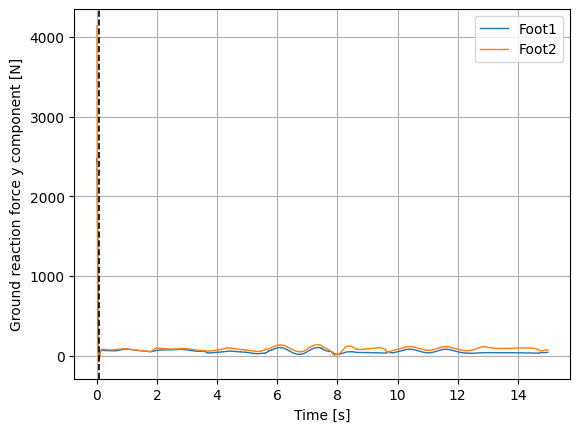

0

In [290]:
multibody_system.data_logger.ground_reaction_force

Foot1 = []
Foot2 = []
for i in range(len(multibody_system.data_logger.ground_reaction_force)):
    Foot1.append(multibody_system.data_logger.ground_reaction_force[i][0].item())
    Foot2.append(multibody_system.data_logger.ground_reaction_force[i][1].item())

plt.plot(t_print, Foot1, linewidth=1)
plt.plot(t_print, Foot2, linewidth=1)

plt.grid()
plt.legend(['Foot1', 'Foot2'])
plt.ylabel("Ground reaction force y component [N]")
plt.xlabel("Time [s]")
plt.axvline(x = changed_time, color = 'k',  linestyle='--', linewidth=1.2)

plt.savefig('./visualized/Simulation No{}/Ground_reaction2.png'.format(sim_num))
plt.show()

os.system('say "Ground reaction force plot is generated."')


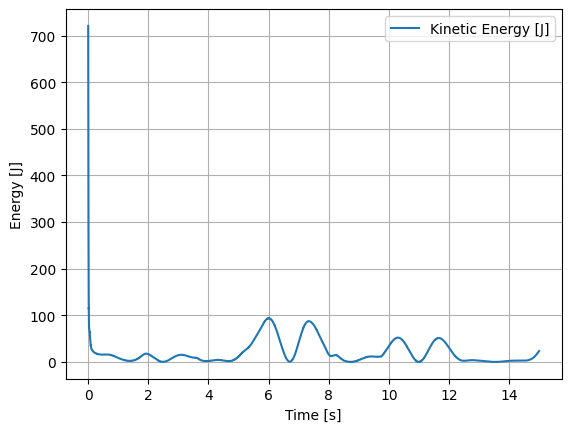

In [291]:
plt.plot(t_print, KE)
plt.legend(['Kinetic Energy [J]'])
plt.grid()
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.savefig('./visualized/Simulation No{}/Kinetic energy.png'.format(sim_num))

plt.show()


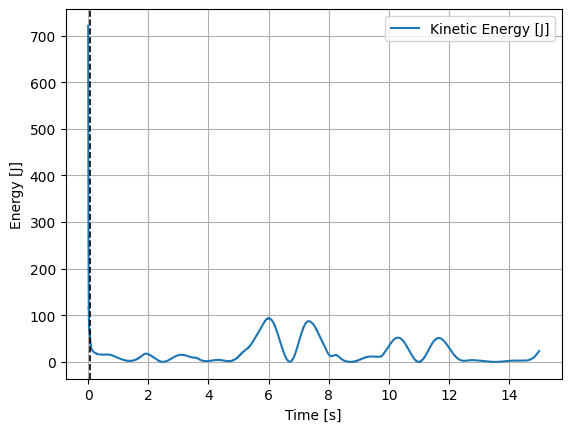

0

In [292]:
plt.plot(t_print, KE)
plt.legend(['Kinetic Energy [J]'])
plt.grid()
plt.ylabel("Energy [J]")
plt.xlabel("Time [s]")
plt.axvline(x = changed_time, color = 'k',  linestyle='--', linewidth=1.2)
plt.savefig('./visualized/Simulation No{}/Kinetic energy2.png'.format(sim_num))

plt.show()
os.system('say "Kinetic Energy plot is generated."')


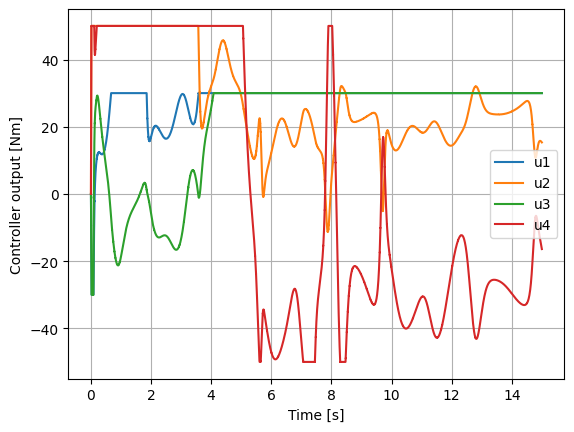

In [293]:
u1 = []
u2 = []
u3 = []
u4 = []
for item in multibody_system.data_logger.current_control_vector_n:
    u1.append(item[0].item())
    u2.append(item[1].item())
    u3.append(item[2].item())
    u4.append(item[3].item())
plt.plot(t_print, u1)
plt.plot(t_print, u2)
plt.plot(t_print, u3)
plt.plot(t_print, u4)

plt.legend(['u1','u2','u3','u4'])
plt.grid()
plt.ylabel("Controller output [Nm]")
plt.xlabel("Time [s]")

plt.savefig('./visualized/Simulation No{}/Controller behavior.png'.format(sim_num))

plt.show()



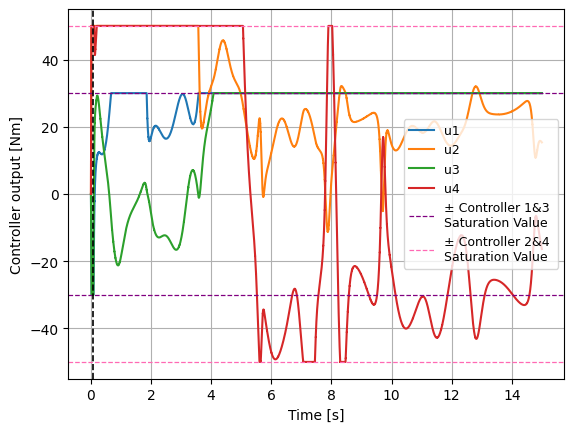

0

In [294]:
controller_saturation = multibody_system.u_max

u1 = []
u2 = []
u3 = []
u4 = []
for item in multibody_system.data_logger.current_control_vector_n:
    u1.append(item[0].item())
    u2.append(item[1].item())
    u3.append(item[2].item())
    u4.append(item[3].item())
plt.plot(t_print, u1)
plt.plot(t_print, u2)
plt.plot(t_print, u3)
plt.plot(t_print, u4)

plt.legend(['u1','u2','u3','u4'])
plt.grid()
plt.ylabel("Controller output [Nm]")
plt.xlabel("Time [s]")
linewidth = 0.9
plt.axhline(y = controller_saturation[0], color = 'purple', linestyle='--',linewidth=linewidth)
plt.axhline(y = controller_saturation[1], color = 'hotpink', linestyle='--',linewidth=linewidth)
plt.axhline(y = -controller_saturation[0], color = 'purple', linestyle='--',linewidth=linewidth)
plt.axhline(y = -controller_saturation[1], color = 'hotpink', linestyle='--',linewidth=linewidth)
plt.legend(['u1','u2','u3','u4','± Controller 1&3 \nSaturation Value','± Controller 2&4 \nSaturation Value'], fontsize="9")


plt.axvline(x = changed_time, color = 'k',  linestyle='--', linewidth=1.2)

plt.savefig('./visualized/Simulation No{}/Controller behavior2.png'.format(sim_num))

plt.show()

os.system('say "Conntroller behavior plot is generated."')


In [295]:
# Solve for Descartes coordinates

link_constant_numerical = [4, 1,1,1,1]
# = get_decart(l_body, l_left_1, l_left_2, l_right_1, l_right_2, generalized_coordinates, sol, link_constant_numerical)
# from Multibody_analyzer.get_Descartes_2D import get_Descartes_2D

(body_left_x,  body_left_y,  body_right_x, body_right_y,  left_knee_x,  left_knee_y,  left_foot_x,  left_foot_y,  right_knee_x, right_knee_y,  right_foot_x,  right_foot_y) = get_Descartes_2D(l_body, 
                                  l_left_1, 
                                  l_left_2, 
                                  l_right_1, 
                                  l_right_2, 
                                  generalized_coordinates, 
                                  sol, 
                                  link_constant_numerical)





In [296]:
len(multibody_system.data_logger.current_kinetic_energy)

12855

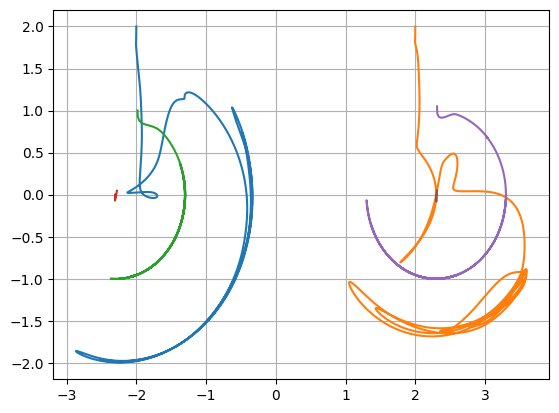

0

In [297]:
plt.plot(body_left_x, body_left_y)
plt.plot(body_right_x, body_right_y,)
plt.plot(left_knee_x, left_knee_y)
plt.plot(left_foot_x, left_foot_y)
plt.plot(right_knee_x, right_knee_y)
plt.plot(right_foot_x, right_foot_y)
plt.grid()
plt.savefig('./visualized/Simulation No{}/Bot xy.png'.format(sim_num))

plt.show()

os.system('say "Planer bot x y plot is generated."')


In [298]:
sim_num

11

100%|██████████████████████████████████████▉| 1497/1500 [00:46<00:00, 34.56it/s]

Saved to ./visualized/2D_bot_sim_11_with_ic=[0.0, 2.0, 0.0, -1.553, -0.318, -1.253, -0.318, 0.0, -10.0, -1.0, 0.0, 0.0, 0.0, 0.0]_AND_control=[23.203, 47.518, -11.588, 32.584].mp4


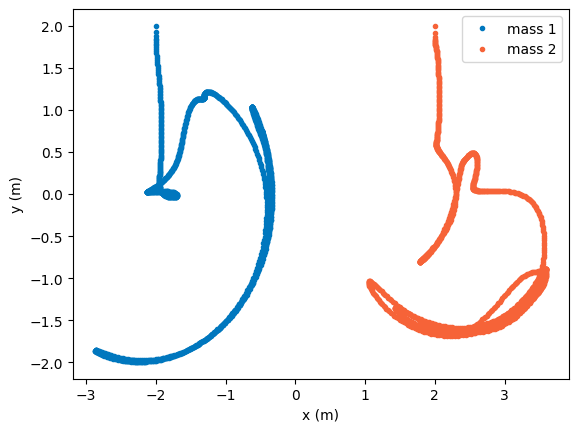

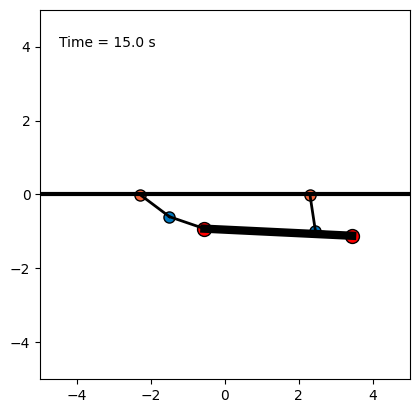

0

In [299]:
# https://github.com/zaman13/Double-Pendulum-Motion-Animation/blob/master/Python%20Code/Double_Pendulum_v1.py
# sim_num += 1
# save_name = '2D_bot_sim_{}_with_ic={}_AND_control={}'.format(sim_num,initial_conditions,[u1,u2,u3,u4,u5,u6,u7])
save_name = '2D_bot_sim_{}_with_ic={}_AND_control={}'.format(sim_num,np.round(initial_conditions, 3).tolist(),np.round(u,3).tolist())

# print('{}'.format(initial_conditions))

import sys
import pylab as py
from matplotlib import animation
py.close('all')

py.figure(1)
#py.plot(t,x1)
#py.plot(t,y1)
py.plot(body_left_x,body_left_y,'.',color = '#0077BE',label = 'mass 1')
py.plot(body_right_x,body_right_y,'.',color = '#f66338',label = 'mass 2' )
py.legend()
py.xlabel('x (m)')
py.ylabel('y (m)')

#py.figure(2)
#py.plot(t,x2)
#py.plot(t,y2)


fig = plt.figure()
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal')

#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
line1, = ax.plot([], [], 'o-',color = '#FF0000',markersize = 10, markerfacecolor = '#FF0000',lw=2, markevery=10000, markeredgecolor = 'k')   # line1, bot left edge
line2, = ax.plot([], [], 'o-',color = '#FF0000',markersize = 10, markerfacecolor = '#FF0000',lw=2, markevery=10000, markeredgecolor = 'k')   # line2, bot right edge
line3, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 8, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line3, bot left knee
line4, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 8, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line4, bot left foot
line5, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 8, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line5, bot right knee
line6, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 8, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line6, bot right foot

line_bot, = ax.plot([], [], color='k', linestyle='-', linewidth=6)
line_left_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line_left_2, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line_right_1, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line_right_2, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

# line5, = ax.plot([], [], 'o', color='k', markersize = 10)
time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ground_bar, = ax.plot([], [], color='k', linestyle='-', linewidth=3)

# initialization function: plot the background of each frame
def init():
    ground_bar.set_data([-8,8],[0,0])

    # These are dots
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])

    # These are lines
    line_bot.set_data([], [])
    line_left_1.set_data([], [])
    line_left_2.set_data([], [])
    line_right_1.set_data([], [])
    line_right_2.set_data([], [])
    
    time_string.set_text('')

    return  line1, line2, line3, line4, line5, line6, line_bot, line_left_1, line_left_2, line_right_1, line_right_2 ,time_string,ground_bar






# plt.plot(body_left_x, body_left_y)
# plt.plot(body_right_x, body_right_y,)
# plt.plot(left_knee_x, left_knee_y)
# plt.plot(left_foot_x, left_foot_y)
# plt.plot(right_knee_x, right_knee_y)
# plt.plot(right_foot_x, right_foot_y)

# animation function.  This is called sequentially
def animate(i):
    
    dt = t_span[2]-t_span[1]          # time step

    line1.set_data(body_left_x[i], body_left_y[i])   # body left edge
    line2.set_data(body_right_x[i], body_right_y[i])   # body right edge 
    line3.set_data(left_knee_x[i], left_knee_y[i])
    line4.set_data(left_foot_x[i], left_foot_y[i])
    line5.set_data(right_knee_x[i], right_knee_y[i])
    line6.set_data(right_foot_x[i], right_foot_y[i])
    
    
    line_bot.set_data([body_left_x[i], body_right_x[i]], [body_left_y[i], body_right_y[i]])
    line_left_1.set_data([body_left_x[i], left_knee_x[i]], [body_left_y[i], left_knee_y[i]])
    line_left_2.set_data([left_knee_x[i], left_foot_x[i]], [left_knee_y[i], left_foot_y[i]])
    line_right_1.set_data([body_right_x[i], right_knee_x[i]], [body_right_y[i], right_knee_y[i]])
    line_right_2.set_data([right_knee_x[i], right_foot_x[i]], [right_knee_y[i], right_foot_y[i]])
    
    # line3.set_data([x1[i], x2[i]], [y1[i], y2[i]])       # line connecting y1 block to weight 1
    # line4.set_data([x2[i], x3[i]], [y2[i],y3[i]])                # line connecting weight 1 to weight 2

    # line5.set_data([x1[i]], [y1[i]]) # y1 block
    time_string.set_text(time_template % (i*dt))

    return  line1, line2, line3, line4, line5, line6, line_bot, line_left_1, line_left_2, line_right_1, line_right_2 ,time_string,ground_bar


# Add progress bar method is found from:
# https://stackoverflow.com/questions/60998231/python-how-to-make-tqdm-print-one-line-of-progress-bar-in-shell
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=tqdm(range(total_step), position=0, leave=True), interval=1000*( t_span[2]-t_span[1])*0.8, blit=True)



# anim.save('./gif_output/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]), extra_args=['-vcodec', 'libx264'])
# anim.save('./visualized/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]))
anim.save('./visualized/{}.mp4'.format(save_name), fps=1.0/(t_span[2]-t_span[1]), extra_args=['-vcodec', 'libx264'])

print('Saved to ./visualized/{}.mp4'.format(save_name))




plt.show()
os.system('say "Please be adviced that your lengthy calculation has beed successfully executed, animation is ready to be reviewed"')


In [300]:
# # print(multibody_system.data_logger.current_kinetic_energy)
# multibody_system.data_logger.current_control_mode
# def list_checker(target_list,t_print):
#     binarilized_list = []
#     for i in range(len(target_list) - 1):
#         if target_list[i] == target_list[i+1]:
#             binarilized_list.append(0)
#         else:
#             binarilized_list.append(1)
#             changed_flag = True
#             changed_time = t_print[i]
            
#         if sum(binarilized_list) == 0:
#             changed_flag = False
#             changed_time = 0
#     return binarilized_list, changed_flag, changed_time

# # check_result, changed_flag , changed_time= list_checker(multibody_system.data_logger.current_control_mode, t_print) 
# # print(check_result)
# # changed_flag
# # changed_time


# # plt.plot(t_print, np.ones(len(t_print)))
# # plt.axvline(x = changed_time, color = 'b')

# # plt.show()

In [301]:
# load_sim_number = 107
# logger = data_logger()
# logger.data_load('./visualized/Simulation No{}/Simulation No{}.npy'.format(load_sim_number, load_sim_number))

100%|██████████████████████████████████████▉| 1497/1500 [00:59<00:00, 34.56it/s]

In [59]:
unactuated_dimension = multibody_system.system_dimension - multibody_system.system_Control_matrix.rank()
actuated_dimension = multibody_system.system_Control_matrix.rank()
system_dimension = multibody_system.system_dimension
actuated_generalized_velocity_vector_indexer = list(range(system_dimension * 2)[(system_dimension + unactuated_dimension):])
actuated_generalized_velocity_vector_indexer

[10, 11, 12, 13]

In [1]:
import os

In [3]:
dumb_story = "The Harvard professor stood in the dimly lit, abandoned building, his eyes blazing with passion as he attempted to explain the concept of generalized Moores Penrose inversion to the group of skeptical individuals before him. Why cant you see the brilliance in this concept? the professor exclaimed, frustration lacing his voice. It has the potential to revolutionize our understanding of linear algebra and reshape the way we approach data analysis.A low, disbelieving hum filled the room as the group exchanged skeptical glances. The professors hands trembled with urgency as he continued to argue his case, his words ricocheting off the cracked walls.Weve been over this, Professor, and we just dont see how this so-called inversion is relevant or practical, one of the individuals countered, his tone dismissive.The professors passionate explanation morphed into desperate pleas, his voice rising in intensity. But you must understand! This is a breakthrough that could change the course of mathematical theory as we know it!A loud, frustrated scream suddenly pierced the air as the professors plea hit a wall of resistance. His shoulders slumped in defeat as he realized the futility of convincing his audience. A heavy silence settled over the room, broken only by the professors resigned sigh.As the group dispersed, leaving the professor standing alone in the abandoned building, he knew that the battle to make them see the potential of generalized Moores Penrose inversion was far from over. It was a conflict between innovation and skepticism, and the stakes had never been higher."







In [4]:
os.system("say '{}'".format(dumb_story))


0

In [283]:
t_dur = []
theta_dur = []
omega_dur = []

def pend(y, t, b, c):
    theta, omega = y
    
    t_dur.append(t)
    theta_dur.append(theta)
    omega_dur.append(omega)
    
    # dydt = [omega, -b*omega - c*np.sin(theta)]
    dydt = [-np.cos(omega), -b*omega - c*np.sin(theta)]
    
    return dydt

b = 0.25
c = 5.0

y2 = [np.pi - 0.1, 0.0]
t2 = np.linspace(0, 10, 1000)
sol2 = odeint(pend, y0=y2, t=t2, args=(b, c))
# plt.plot(t2,'k')
# plt.plot(t_dur,'b')
# plt.grid()
# plt.show()

print(len(t2))
print(len(t_dur))
# print(sum(t2))
# print(np.diff(list_))

1000
529


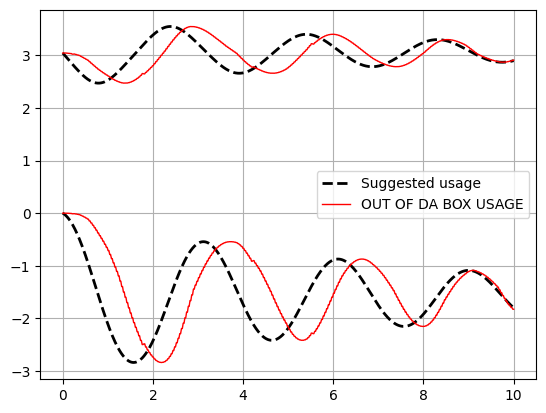

In [391]:
t3 = np.linspace(0,10, len(theta_dur))

plt.plot(t2, sol2.T[0],'k',linestyle='--',linewidth = 2)
plt.plot(t3, theta_dur, 'r', linewidth = 1)

plt.plot(t2, sol2.T[1],'k',linestyle='--',linewidth = 2)
plt.plot(t3, omega_dur, 'r', linewidth = 1)

plt.legend(['Suggested usage','OUT OF DA BOX USAGE'])
plt.grid()

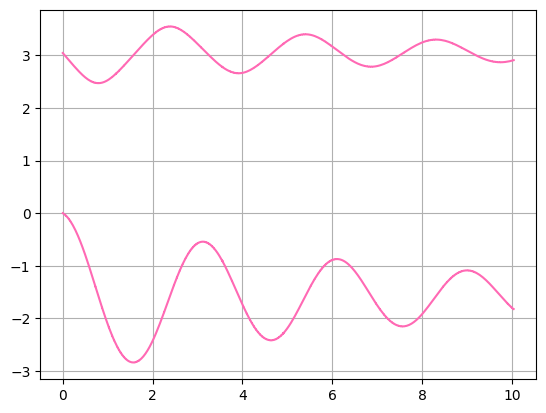

In [390]:


plt.plot(t_dur, theta_dur, 'hotpink')
plt.plot(t_dur, omega_dur, 'hotpink')
plt.grid()